<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Esercizio-Regressione:-Abalone-dataset" data-toc-modified-id="Esercizio-Regressione:-Abalone-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Esercizio Regressione: Abalone dataset</a></span></li></ul></div>

### Esercizio Regressione: Abalone dataset

Confrontare diversi algoritmi di regressione sul dataset abalone.

- [dataset](http://archive.ics.uci.edu/ml/datasets/Abalone)

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv("abalone.data" , header = None)
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.set_axis(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'], axis='columns', inplace=True)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
#
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [24]:
#essendo la colonna SEX l'unica a non essere un valore numerico, andiamo a indagarla per poi trasformarla successivamente
#con il one hot encoder
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

C:\Users\Aragon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

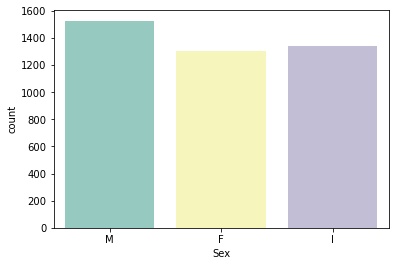

In [29]:
#EDA
#grafichiamo il numero di samples in base al Sex

sns.countplot(data.Sex, palette="Set3") 


C:\Users\Aragon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aragon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


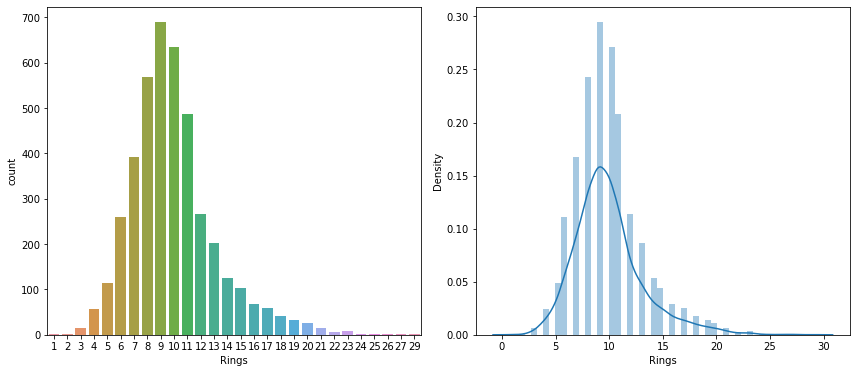

In [18]:
#abbiamo capito di dover predire la colonna Rings, che per questa specie animale corrisponde al numero degli anni.
#per questo vediamo un po' per quali range abbiamo il maggior numero di samples

plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.countplot(data.Rings)

plt.subplot(2,2,2)
sns.distplot(data.Rings)


plt.tight_layout()

<AxesSubplot:>

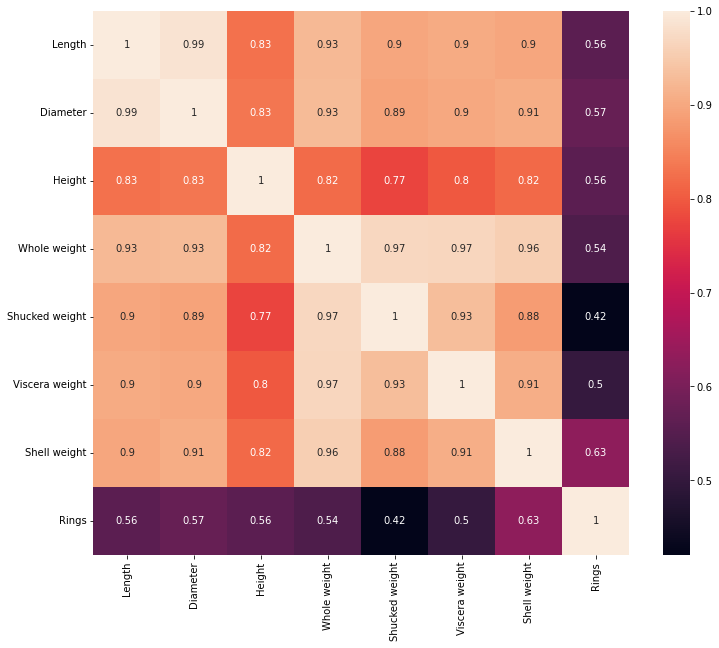

In [14]:
#cerchiamo di capire la correlazione delle diverse variabili con la label Rings
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

In [15]:
#correlazione in maniera decrescente delle variabili
data.corr().Rings.sort_values(ascending=False) 

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

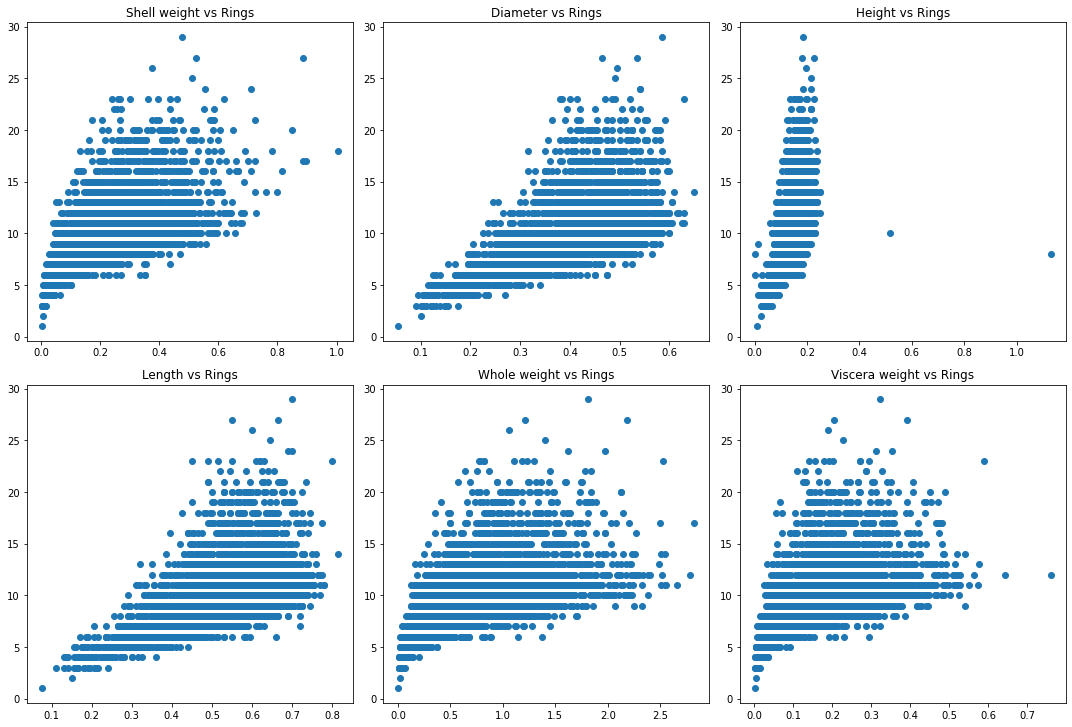

In [17]:
#grafichiamo le singole variabili in base alla correlazione maggiore rispetto alla label Rings
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(data['Shell weight'],data['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(data['Diameter'],data['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(data['Height'],data['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(data['Length'],data['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(data['Whole weight'],data['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(data['Viscera weight'],data['Rings'])

plt.tight_layout()

In [19]:
# Sia dalla distribuzione sopra che dai grafici di correlazione si può vedere che abbiamo una maggiore correlazione 
#nella predizione dei Rings tra 3 e 15, per questo creiamo un nuovo dataframe con i soli elementi in questo range

new_df = data[data.Rings < 16]
new_df = new_df[new_df.Rings > 2]

In [20]:
#facciamo il one hot encoder per la colonna Sex
X_c=new_df[['Sex']]
X_c.shape

#encoding categorical

ohe = OneHotEncoder(sparse=False, drop='if_binary')
X_c = ohe.fit_transform(X_c.values)

# oppure con pandas
# X_cat = pd.get_dummies(X_cat, columns=categorical).values

print(X_c.shape)


(3914, 3)


In [21]:
#scegliamo la label da predire (Rings) e creiamo la nostra X concatenando le nuove variabili derivate dal one hot encoder e
#le rimanenti

Y = new_df['Rings']
X = np.concatenate([X_c,new_df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]], axis =1)
X = preprocessing.normalize(X)

#splittiamo il nostro dataset in train e test (70-30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)



In [22]:
X

array([[0.        , 0.        , 0.76773938, ..., 0.17235749, 0.07754168,
        0.11516091],
       [0.        , 0.        , 0.88776632, ..., 0.08833275, 0.04305667,
        0.06214364],
       [0.6960966 , 0.        , 0.        , ..., 0.17854878, 0.09849767,
        0.14618029],
       ...,
       [0.        , 0.        , 0.53726985, ..., 0.28233531, 0.15446508,
        0.16547911],
       [0.55182308, 0.        , 0.        , ..., 0.29301806, 0.14402582,
        0.16333963],
       [0.        , 0.        , 0.37993576, ..., 0.35922926, 0.14304581,
        0.1880682 ]])

In [26]:
# regressione lineare
regr = LinearRegression()
regr.fit(X_train, Y_train)

Y_pred_testLR = regr.predict(X_test) # eseguiamo la predizione sul test set

In [27]:
#regressione con DecisionTree
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)
Y_pred_DT = regressor.predict(X_test)

In [37]:
#regressione polinomiale
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)
model = LinearRegression()
model.fit(X_poly, Y_train)
Y_pred_PF = model.predict(X_poly_test)

In [38]:
#regressione lineare
print("MSE test of Linear Regression is: %f" % mean_squared_error(Y_test, Y_pred_testLR))
print("R2 test of Linear Regression is: %f" % r2_score(Y_test, Y_pred_testLR))

#decision Tree
print("MSE test of Decision Tree is: %f" % mean_squared_error(Y_test, Y_pred_DT))
print("R2 test of Decision Tree is: %f" % r2_score(Y_test, Y_pred_DT))

#regressione polinomiale
print("MSE test of Polynomial is: %f" % mean_squared_error(Y_test, Y_pred_PF))
print("R2 test of Polynomial is: %f" % r2_score(Y_test, Y_pred_PF))




MSE test of Linear Regression is: 2.736865
R2 test of Linear Regression is: 0.511906
MSE test of Decision Tree is: 4.926809
R2 test of Decision Tree is: 0.121351
MSE test of Polynomial is: 20.313788
R2 test of Polynomial is: -2.622769


In [ ]:
#il linear regression sembra essere un modello migliore rispetto agli altri poichè r2_score è > 0,3